In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Dense, Flatten, Add, Input, BatchNormalization, Conv2D, MaxPooling2D, Concatenate, GlobalAveragePooling2D, Dropout

# MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#for faster convergence, bringing all values to the same range 0-1
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

11490434/11490434 [==============================] - 1s 0us/step


#### Simple Model

In [25]:
input = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               2769408   
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                          

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 109s 72ms/step - loss: 0.1329 - accuracy: 0.9589 - val_loss: 0.0719 - val_accuracy: 0.9772
Epoch 2/5
1500/1500 [==============================] - 101s 67ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0848 - val_accuracy: 0.9762
Epoch 3/5
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9833
Epoch 4/5
1500/1500 [==============================] - 126s 84ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0681 - val_accuracy: 0.9831
Epoch 5/5
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0769 - val_accuracy: 0.9798


In [27]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 5s 15ms/step
Confusion Matrix:
[[ 971    1    2    1    0    1    3    0    0    1]
 [   0 1125    1    3    0    0    4    2    0    0]
 [   1    1 1015   11    0    0    0    2    2    0]
 [   0    1    1  999    0    5    0    0    2    2]
 [   0    1    4    1  943    0    5    0    2   26]
 [   0    0    0    8    0  880    1    0    0    3]
 [   4    3    1    1    1    8  937    0    3    0]
 [   0    1   14    5    0    0    0  992    2   14]
 [   2    3    0    7    1   10    1    1  939   10]
 [   0    3    0    0    2    5    0    1    3  995]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       1.00      0.96      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.95      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Model with skip connections

In [20]:
input = Input(shape=(28, 28, 1))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)

pool1 = MaxPooling2D((2, 2))(conv1)

conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)

skip2 = Concatenate()([pool1, conv3])

pool2 = MaxPooling2D((2, 2))(skip2)

x = Flatten()(pool2)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 28, 28, 32)           320       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)           0         ['conv2d_7[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 14, 14, 64)           18496     ['max_pooling2d_2[0][0]'

In [ ]:
keras.util.plot_model(model)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1314 - accuracy: 0.9593 - val_loss: 0.0595 - val_accuracy: 0.9824
Epoch 2/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0492 - val_accuracy: 0.9862
Epoch 3/5
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 4/5
1500/1500 [==============================] - 86s 57ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 5/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0331 - val_accuracy: 0.9913


In [23]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 6s 18ms/step
Confusion Matrix:
[[ 974    0    0    0    0    0    5    0    0    1]
 [   0 1132    0    0    0    0    3    0    0    0]
 [   2    1 1025    2    0    0    0    2    0    0]
 [   1    0    0 1006    0    2    0    0    1    0]
 [   0    1    1    0  968    0    2    0    2    8]
 [   1    0    0    3    0  887    1    0    0    0]
 [   2    1    0    0    1    2  951    0    1    0]
 [   0    2    6    1    0    0    0 1006    1   12]
 [   3    1    1    2    0    1    0    0  964    2]
 [   1    0    0    0    2    4    0    3    2  997]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



With the skip connection added to the architecture the accuracy increased from 0.98 to 0.99 for mnist dataset

# Cifar 10

In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

170498071/170498071 [==============================] - 6s 0us/step


In [41]:
(x_train.shape, y_train.shape)

((50000, 32, 32, 3), (50000, 1))

#### Simple Model

In [33]:
input = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               3686912   
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                          

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 119s 95ms/step - loss: 1.3369 - accuracy: 0.5234 - val_loss: 1.5053 - val_accuracy: 0.4935
Epoch 2/5
1250/1250 [==============================] - 115s 92ms/step - loss: 1.0317 - accuracy: 0.6325 - val_loss: 1.2377 - val_accuracy: 0.5768
Epoch 3/5
1250/1250 [==============================] - 128s 102ms/step - loss: 0.8877 - accuracy: 0.6859 - val_loss: 1.0891 - val_accuracy: 0.6265
Epoch 4/5
1250/1250 [==============================] - 116s 93ms/step - loss: 0.7623 - accuracy: 0.7314 - val_loss: 1.3523 - val_accuracy: 0.5727
Epoch 5/5
1250/1250 [==============================] - 117s 94ms/step - loss: 0.6523 - accuracy: 0.7697 - val_loss: 1.4277 - val_accuracy: 0.5908


In [35]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 6s 20ms/step
Confusion Matrix:
[[594  38 137  49  66   6  44   8  39  19]
 [ 22 818  15  35  19   6  47   0  12  26]
 [ 46   7 478 101 170  45 132  15   5   1]
 [  8  10  70 535 134  71 154   9   8   1]
 [  8   3  75  74 698   9 114  12   6   1]
 [  6   7  61 351 108 351  85  29   1   1]
 [  3   4  25  61  60  10 834   0   2   1]
 [ 11  12  47 106 212  42  47 515   4   4]
 [107  80  45  53  38   2  45   5 609  16]
 [ 38 284  11 101  46  15  69  12  25 399]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1000
           1       0.65      0.82      0.72      1000
           2       0.50      0.48      0.49      1000
           3       0.36      0.54      0.43      1000
           4       0.45      0.70      0.55      1000
           5       0.63      0.35      0.45      1000
           6       0.53      0.83      0.65      1000
           7       0.85      0.52      0.64      1000
           8       0.86      0.61      0.71      1000
           9       0.85      0.40      0.54      1000

    accuracy                           0.58     10000
   macro avg       0.64      0.58      0.58     10000
weighted avg       0.64      0.58      0.58     10000



#### Skip connection

In [47]:
input = Input(shape=(32, 32, 3))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
skip1 = Concatenate()([conv1, conv2])

pool1 = MaxPooling2D((2, 2))(skip1)

conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
skip2 = Concatenate()([pool1, conv4])

pool2 = MaxPooling2D((2, 2))(skip2)

x = Flatten()(pool2)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 32, 32, 32)           896       ['input_13[0][0]']            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_26[0][0]']           
                                                                                                  
 concatenate_10 (Concatenat  (None, 32, 32, 64)           0         ['conv2d_26[0][0]',           
 e)                                                                  'conv2d_27[0][0]']     

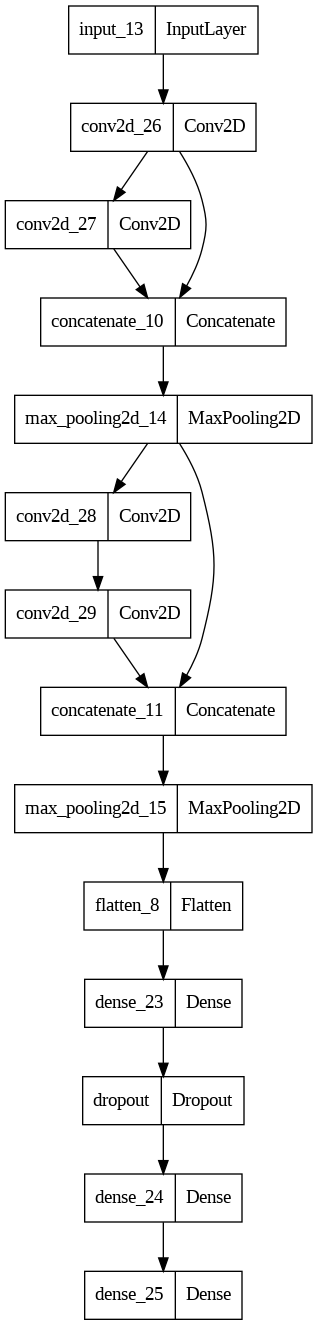

In [50]:
keras.utils.plot_model(model)

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 366s 291ms/step - loss: 1.3814 - accuracy: 0.4990 - val_loss: 1.0094 - val_accuracy: 0.6498
Epoch 2/5
1250/1250 [==============================] - 394s 315ms/step - loss: 0.9459 - accuracy: 0.6632 - val_loss: 0.8503 - val_accuracy: 0.7095
Epoch 3/5
1250/1250 [==============================] - 357s 286ms/step - loss: 0.7794 - accuracy: 0.7264 - val_loss: 0.8523 - val_accuracy: 0.7052
Epoch 4/5
1250/1250 [==============================] - 357s 286ms/step - loss: 0.6600 - accuracy: 0.7689 - val_loss: 0.7624 - val_accuracy: 0.7383
Epoch 5/5
1250/1250 [==============================] - 362s 290ms/step - loss: 0.5608 - accuracy: 0.8014 - val_loss: 0.7525 - val_accuracy: 0.7450


In [51]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 22s 72ms/step
Confusion Matrix:
[[828  12  27  25  26   6   2   6  41  27]
 [ 30 842   7   7   1   6   5   4   9  89]
 [ 85   3 589  55 121  87  33  10  10   7]
 [ 26   4  56 507  91 247  30  22   4  13]
 [ 15   1  58  45 781  45  18  27   7   3]
 [ 14   1  28 125  68 718   7  30   5   4]
 [  9   3  61  59  67  65 726   1   4   5]
 [  9   0  23  42 100  84   1 729   1  11]
 [ 84  21  13  16   8   7   3   8 812  28]
 [ 43  42   1  20   5   7   3  24  14 841]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1000
           1       0.91      0.84      0.87      1000
           2       0.68      0.59      0.63      1000
           3       0.56      0.51      0.53      1000
           4       0.62      0.78      0.69      1000
           5       0.56      0.72      0.63      1000
           6       0.88      0.73      0.79      1000
           7       0.85      0.73      0.78      1000
           8       0.90      0.81      0.85      1000
           9       0.82      0.84      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



Accuracy increased from 0.58 to 0.74 with skip connection